<a href="https://colab.research.google.com/github/oliverzannino/oliverza/blob/main/2025_Final_AssignmentPart1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="font-family:Impact,Arial;font-size:30px;">37004 Interest Rates and Credit Risk Models - Spring 2025</h1>
<h1 style="font-family:Impact,Arial;font-size:45px;">Assignment Part 1</h1>
<h2 style="font-family:Arial;">Erik Schl&ouml;gl</h2>
<p><small> School of Mathematical &amp; Physical Sciences<br>
University of Technology Sydney
</small></p>
<p>
<a href="mailto:Erik.Schlogl@uts.edu.au?Subject=37000 JIT" target="_blank">
<small><font color=MediumVioletRed>Erik.Schlogl@uts.edu.au</font></small></a>
</p>
<hr style="height:5px;border:none;color:#333;background-color:#333;" />

Execute the following cell for a `pandas` DataFrame of Australian interest rate data on 30 July 2025:

In [120]:
import pandas as pd
df = pd.DataFrame([{"Type":"BBSW","Term":"1 month","Rate":3.6909},{"Type":"BBSW","Term":"2 months","Rate":3.6963},{"Type":"BBSW","Term":"3 months","Rate":3.7018},{"Type":"BBSW","Term":"4 months","Rate":3.7225},{"Type":"BBSW","Term":"5 months","Rate":3.7375},{"Type":"BBSW","Term":"6 months","Rate":3.7772},{"Type":"Swap","Term":"1 year","Rate":3.61},{"Type":"Swap","Term":"2 years","Rate":3.52},{"Type":"Swap","Term":"3 years","Rate":3.55},{"Type":"Swap","Term":"4 years","Rate":3.62},{"Type":"Swap","Term":"5 years","Rate":3.72},{"Type":"Swap","Term":"6 years","Rate":3.78},{"Type":"Swap","Term":"7 years","Rate":3.93},{"Type":"Swap","Term":"10 years","Rate":4.18},{"Type":"Swap","Term":"12 years","Rate":4.30},{"Type":"Swap","Term":"15 years","Rate":4.42},{"Type":"Swap","Term":"20 years","Rate":4.51},{"Type":"Swap","Term":"25 years","Rate":4.51},{"Type":"Swap","Term":"30 years","Rate":4.48},{"Type":"Swap","Term":"40 years","Rate":4.28}])
df

,Type,Term,Rate
0,BBSW,1 month,3.6909
1,BBSW,2 months,3.6963
2,BBSW,3 months,3.7018
3,BBSW,4 months,3.7225
4,BBSW,5 months,3.7375
5,BBSW,6 months,3.7772
6,Swap,1 year,3.6100
7,Swap,2 years,3.5200
8,Swap,3 years,3.5500
9,Swap,4 years,3.6200


Note that the bank bill swap rate (BBSW) is quoted per annum with simple compounding, and "Swaps are quoted on a quarterly basis for maturities out to 3 years and on a semi-annual basis for maturities 4 years and greater." AFMA (2023), Interest Rate Derivative Conventions (see https://afma.com.au/getattachment/Standards/Market-Conventions/Sections/Content/Interest-Rate-Derivative-Conventions-2023-07.pdf?lang=en-AU )

<H2>Task 1:</H2>
Determine the term structure of zero coupon bond prices that these rates imply, using loglinear interpolation of zero coupon bond prices where necessary. <I>(4 marks)</I>

In [121]:
#find term in years and add a column to df
def convert_term_to_years(term_str):
    if 'month' in term_str:
        return int(term_str.split(' ')[0]) / 12
    elif 'year' in term_str:
        return int(term_str.split(' ')[0])
    return None

df['Term_in_years'] = df['Term'].apply(convert_term_to_years)

# split up BBSW and Swap into two seperate df
df_bbsw = df[df['Type'] == 'BBSW'].copy()
df_swap = df[df['Type'] == 'Swap'].copy()

#find Discount factors for 1-6m BBSW
df_bbsw['Discount Factor'] = 1 / (1 + df_bbsw['Rate'] / 100 * df_bbsw['Term_in_years'])

#then combine the two dfs
df1 = pd.concat([df_bbsw, df_swap])

# Sort by term for easier handling later
df1 = df1.sort_values(by='Term_in_years')

display(df1)

,Type,Term,Rate,Term_in_years,Discount Factor
0,BBSW,1 month,3.6909,0.083333,0.996934
1,BBSW,2 months,3.6963,0.166667,0.993877
2,BBSW,3 months,3.7018,0.250000,0.990830
3,BBSW,4 months,3.7225,0.333333,0.987744
4,BBSW,5 months,3.7375,0.416667,0.984666
5,BBSW,6 months,3.7772,0.500000,0.981464
6,Swap,1 year,3.6100,1.000000,NaN
7,Swap,2 years,3.5200,2.000000,NaN
8,Swap,3 years,3.5500,3.000000,NaN
9,Swap,4 years,3.6200,4.000000,NaN


In [122]:
# for the 1 year swap DF , we need to write B(0,0.75) as a function of B(0,0.5) and B(0,1) so that we have only one unknown.
# FORMULA FOR LOG LINEAR INTERPOLATION: Ln(B(0,Ti)) = ln(B(0,T1) + (Ti-T1)/(T2-T1) * [ (lnB(0,T2)) - ln(B(0,T1)) ] . Substitute in, then exponentiate.
# e.g. Ln(B(0,0.75)) = ln(B(0,0.5) + 1/2 * [ (lnB(0,1)) - ln(B(0,0.5)) ]
#B(0,0.75) = (B(0,0.5)*B(0,1))^1/2

# r1 = (1-B(0,1))/(0.25*(B(0,0.25)+B(0,0.5)+(B(0,0.5)*B(0,1))^1/2)+B(0,1)) - we know B(0,0.25) and B(0,0.5) -  we only have one unknown, and can solve using root_scalar

from scipy.optimize import root_scalar
import numpy as np

B_025 = df1.loc[df1['Term_in_years'] == 0.25, 'Discount Factor'].values[0]
B_05 = df1.loc[df1['Term_in_years'] == 0.5, 'Discount Factor'].values[0]
r1 = df1.loc[(df1['Term_in_years'] == 1.0) & (df1['Type'] == 'Swap'), 'Rate'].values[0] / 100  # convert % to decimal

#now call B(0,1) 'x' and solve
def swap_rate_equation(x):
    numerator = 1 - x
    denominator = 0.25 * (B_025 + B_05 + np.sqrt(B_05 * x) + x)
    return (numerator / denominator) - r1

# Solve for B(0,1) using root_scalar
result = root_scalar(swap_rate_equation, bracket=[0.8, 1.0], method='brentq')

# Extract the root
B_1 = result.root
B_075 = np.sqrt(B_05 * B_1) # now that we have B_1, we can solve for B_075
print(f"B(0,0.75) = {B_075:.6f}")
print(f"B(0,1) = {B_1:.6f}")

# Store B_1 in df1 at the correct location
df1.loc[6, 'Discount Factor'] = B_1

#test that the ratio equals r1 (3.61)
i = 1-B_1
u = 0.25*(B_025 + B_05 + B_075 + B_1)
print(i/u)

B(0,0.75) = 0.973052
B(0,1) = 0.964712
0.03609999999999919


In [123]:
# 2 year, we need to write B(0,1.25), B(0,1.5) and B(0,1.75) all as a function of B(0,1) and B(0,2)

r2 = df1.loc[(df1['Term_in_years'] == 2.0) & (df1['Type'] == 'Swap'), 'Rate'].values[0] / 100  # convert % to decimal

#now call B(0,2) 'x' and solve
def two_year_swap_equation(x):
    numerator = 1 - x
    denominator = 0.25 * (
        B_025 +                     # 3M
        B_05 +                      # 6M
        B_075 +                     # 9M
        B_1 +                       # 1Y
        B_1**(0.75) * x**(0.25) +   # 1.25Y approx
        np.sqrt(B_1 * x) +          # 1.5Y approx
        B_1**(0.25) * x**(0.75) +   # 1.75Y approx
        x                           # 2Y
    )
    return (numerator / denominator) - r2

result = root_scalar(two_year_swap_equation, bracket=[0.8, 1.0], method='brentq')
B_2 = result.root
B_125 = B_1**(0.75) * B_2**(0.25) #interpolate
B_15 = np.sqrt(B_1 * B_2)
B_175 = B_1**(0.25) * B_2**(0.75)
print(f"B(0,1.25) = {B_125:.6f}")
print(f"B(0,1.5) = {B_15:.6f}")
print(f"B(0,1.75) = {B_175:.6f}")
print(f"B(0,2) = {B_2:.6f}")

# Store B_2 in df1 at the correct location
df1.loc[7, 'Discount Factor'] = B_2

a = 1-B_2
z = 0.25*(B_025 + B_05 + B_075 + B_1 + B_125 + B_15 + B_175 + B_2)
print(a/z) # should be 0.0352

B(0,1.25) = 0.956517
B(0,1.5) = 0.948392
B(0,1.75) = 0.940336
B(0,2) = 0.932349
0.03519999999999948


In [124]:
#B(0,3) - continue same process

r3 = df1.loc[(df1['Term_in_years'] == 3.0) & (df1['Type'] == 'Swap'), 'Rate'].values[0] / 100  # convert % to decimal
print(r3)

def three_year_swap_equation(x):
    numerator = 1 - x
    denominator = 0.25 * (
        B_025 +
        B_05 +
        B_075 +
        B_1 +
        B_125 +
        B_15 +
        B_175 +
        B_2 +                           # 2Y
        B_2**(0.75) * x**(0.25) +   # 2.25Y approx
        np.sqrt(B_2 * x) +          # 2.5Y approx
        B_2**(0.25) * x**(0.75) +   # 2.75Y approx
        x                           # 3Y
    )
    return (numerator / denominator) - r3

result = root_scalar(three_year_swap_equation, bracket=[0.8, 1.0], method='brentq')
B_3 = result.root
B_225 = B_2**(0.75) * B_3**(0.25) #interpolate
B_25 = np.sqrt(B_2 * B_3)
B_275 = B_2**(0.25) * B_3**(0.75)
print(f"B(0,2.25) = {B_225:.6f}")
print(f"B(0,2.5) = {B_25:.6f}")
print(f"B(0,2.75) = {B_275:.6f}")
print(f"B(0,3) = {B_3:.6f}")

# Store B_2 in df1 at the correct location
df1.loc[8, 'Discount Factor'] = B_3

b = 0.25*(B_025 + B_05 + B_075 + B_1 + B_125 + B_15 + B_175 + B_2+ B_225 + B_25 + B_275 + B_3)
print((1-B_3)/b) #should be 3.55

df1



0.0355
B(0,2.25) = 0.924002
B(0,2.5) = 0.915730
B(0,2.75) = 0.907532
B(0,3) = 0.899408
0.03549999999999997


,Type,Term,Rate,Term_in_years,Discount Factor
0,BBSW,1 month,3.6909,0.083333,0.996934
1,BBSW,2 months,3.6963,0.166667,0.993877
2,BBSW,3 months,3.7018,0.250000,0.990830
3,BBSW,4 months,3.7225,0.333333,0.987744
4,BBSW,5 months,3.7375,0.416667,0.984666
5,BBSW,6 months,3.7772,0.500000,0.981464
6,Swap,1 year,3.6100,1.000000,0.964712
7,Swap,2 years,3.5200,2.000000,0.932349
8,Swap,3 years,3.5500,3.000000,0.899408
9,Swap,4 years,3.6200,4.000000,NaN


In [125]:
# discount factors for semi annual basis . 4 years and out. same process

r4 = df1.loc[(df1['Term_in_years'] == 4.0) & (df1['Type'] == 'Swap'), 'Rate'].values[0] / 100  # convert % to decimal
r4

def four_year_swap_equation(x):
    numerator = 1 - x
    denominator = 0.5 * ( B_05 + B_1 + B_15 + B_2 + B_25 + B_3 +
        np.sqrt(B_3 * x) +
        x                          # only doing discount factors every 6m
    )
    return (numerator / denominator) - r4

result = root_scalar(four_year_swap_equation, bracket=[0.8, 1.0], method='brentq')
B_4 = result.root
B_35 = np.sqrt(B_3 * B_4)

print(f"B(0,3.5) = {B_35:.6f}")
print(f"B(0,4) = {B_4:.6f}")

df1.loc[9, 'Discount Factor'] = B_4


ab = 1-B_4
abc = 0.5*(B_05 + B_1 + B_15 + B_2 + B_25 + B_3 + B_35 + B_4)
print(ab/abc) #should be 3.62

B(0,3.5) = 0.882660
B(0,4) = 0.866224
0.03619999999999992


In [126]:
#B(0,5)

r5 = df1.loc[(df1['Term_in_years'] == 5.0) & (df1['Type'] == 'Swap'), 'Rate'].values[0] / 100  # convert % to decimal
r5

def five_year_swap_equation(x):
    numerator = 1 - x
    denominator = 0.5 * ( B_05 + B_1 + B_15 + B_2 + B_25 + B_3 + B_35 + B_4 +
        np.sqrt(B_4 * x) +
        x
    )
    return (numerator / denominator) - r5

result = root_scalar(five_year_swap_equation, bracket=[0.8, 1.0], method='brentq')
B_5 = result.root
B_45 = np.sqrt(B_4 * B_5)

print(f"B(0,4.5) = {B_45:.6f}")
print(f"B(0,5) = {B_5:.6f}")

df1.loc[10, 'Discount Factor'] = B_5

j = 1-B_5
xp = 0.5*(B_05 + B_1 + B_15 + B_2 + B_25 + B_3 + B_35 + B_4 + B_45 + B_5)
print(j/xp)

df1

B(0,4.5) = 0.848574
B(0,5) = 0.831283
0.037200000000000004


,Type,Term,Rate,Term_in_years,Discount Factor
0,BBSW,1 month,3.6909,0.083333,0.996934
1,BBSW,2 months,3.6963,0.166667,0.993877
2,BBSW,3 months,3.7018,0.250000,0.990830
3,BBSW,4 months,3.7225,0.333333,0.987744
4,BBSW,5 months,3.7375,0.416667,0.984666
5,BBSW,6 months,3.7772,0.500000,0.981464
6,Swap,1 year,3.6100,1.000000,0.964712
7,Swap,2 years,3.5200,2.000000,0.932349
8,Swap,3 years,3.5500,3.000000,0.899408
9,Swap,4 years,3.6200,4.000000,0.866224


In [127]:
#B(0,6)

r6 = df1.loc[(df1['Term_in_years'] == 6.0) & (df1['Type'] == 'Swap'), 'Rate'].values[0] / 100  # convert % to decimal
r6

def six_year_swap_equation(x):
    numerator = 1 - x
    denominator = 0.5 * ( B_05 + B_1 + B_15 + B_2 + B_25 + B_3 + B_35 + B_4 + B_45 + B_5 + np.sqrt(B_5 * x) +
        x
    )
    return (numerator / denominator) - r6

result = root_scalar(six_year_swap_equation, bracket=[0.7, 1.0], method='brentq')
B_6 = result.root
B_55 = np.sqrt(B_5 * B_6)

print(f"B(0,5.5) = {B_55:.6f}")
print(f"B(0,6) = {B_6:.6f}")

m = 0.5*(B_05 + B_1 + B_15 + B_2 + B_25 + B_3 + B_35 + B_4 + B_45 + B_5 + B_55 + B_6)
n = 1-B_6
print(n/m)
print(r6)

df1.loc[11, 'Discount Factor'] = B_6
df1

B(0,5.5) = 0.814514
B(0,6) = 0.798084
0.037799999999999945
0.0378


,Type,Term,Rate,Term_in_years,Discount Factor
0,BBSW,1 month,3.6909,0.083333,0.996934
1,BBSW,2 months,3.6963,0.166667,0.993877
2,BBSW,3 months,3.7018,0.250000,0.990830
3,BBSW,4 months,3.7225,0.333333,0.987744
4,BBSW,5 months,3.7375,0.416667,0.984666
5,BBSW,6 months,3.7772,0.500000,0.981464
6,Swap,1 year,3.6100,1.000000,0.964712
7,Swap,2 years,3.5200,2.000000,0.932349
8,Swap,3 years,3.5500,3.000000,0.899408
9,Swap,4 years,3.6200,4.000000,0.866224


In [128]:
#B(0,7)

r7 = df1.loc[(df1['Term_in_years'] == 7.0) & (df1['Type'] == 'Swap'), 'Rate'].values[0] / 100  # convert % to decimal
print(r7)

def seven_year_swap_equation(x):
    numerator = 1 - x
    denominator = 0.5 * ( B_05 + B_1 + B_15 + B_2 + B_25 + B_3 + B_35 + B_4 + B_45 + B_5 + B_55 + B_6 +
        np.sqrt(B_6 * x) +
        x
    )
    return (numerator / denominator) - r7

result = root_scalar(seven_year_swap_equation, bracket=[0.7, 1.0], method='brentq')
B_7 = result.root
B_65 = np.sqrt(B_6 * B_7)

print(f"B(0,6.5) = {B_65:.6f}")
print(f"B(0,7) = {B_7:.6f}")

w = 1-B_7
q = 0.5*(B_05 + B_1 + B_15 + B_2 + B_25 + B_3 + B_35 + B_4 + B_45 + B_5 + B_55 + B_6 + B_65 + B_7)
print(w/q) #3.93

df1.loc[12, 'Discount Factor'] = B_7


0.0393
B(0,6.5) = 0.778726
B(0,7) = 0.759839
0.03930000000005296


In [129]:
#B(0,10) - need to rewrite B(0,7.5), B(0,8)... B(0,9.5) all as a function of B(0,10)

r10 = df1.loc[(df1['Term_in_years'] == 10.0) & (df1['Type'] == 'Swap'), 'Rate'].values[0] / 100  # convert % to decimal
print(r10)

def ten_year_swap_equation(x):
    numerator = 1 - x
    denominator = 0.5 * ( B_05 + B_1 + B_15 + B_2 + B_25 + B_3 + B_35 + B_4 + B_45 + B_5 + B_55 + B_6 + B_65 + B_7 +
        B_7**(5/6) * x**(1/6) +
        B_7**(4/6) * x**(2/6) +
        np.sqrt(B_7 * x) +
        B_7**(2/6) * x**(4/6) +
        B_7**(1/6) * x**(5/6) +
        x
    )
    return (numerator / denominator) - r10

result = root_scalar(ten_year_swap_equation, bracket=[0.5, 1.0], method='brentq')
B_10 = result.root
B_75 = B_7**(5/6) * B_10**(1/6)
B_8 = B_7**(4/6) * B_10**(2/6)
B_85 = np.sqrt(B_7 * B_10)
B_9 = B_7**(2/6) * B_10**(4/6)
B_95 = B_7**(1/6) * B_10**(5/6)


print(f"B(0,7.5) = {B_75:.6f}")
print(f"B(0,8) = {B_8:.6f}")
print(f"B(0,8.5) = {B_85:.6f}")
print(f"B(0,9) = {B_9:.6f}")
print(f"B(0,9.5) = {B_95:.6f}")
print(f"B(0,10) = {B_10:.6f}")

ab = 1-B_10
ba = 0.5*(B_05 + B_1 + B_15 + B_2 + B_25 + B_3 + B_35 + B_4 + B_45 + B_5 + B_55 + B_6 + B_65 + B_7 + B_75 + B_8 + B_85 + B_9 + B_95 + B_10)
print(ab/ba) #4.18
df1.loc[13, 'Discount Factor'] = B_10


0.0418
B(0,7.5) = 0.741635
B(0,8) = 0.723868
B(0,8.5) = 0.706527
B(0,9) = 0.689601
B(0,9.5) = 0.673080
B(0,10) = 0.656955
0.04179999999999989


In [130]:
#B(0,12)

r12 = df1.loc[(df1['Term_in_years'] == 12.0) & (df1['Type'] == 'Swap'), 'Rate'].values[0] / 100  # convert % to decimal
print(r12)

def twelve_year_swap_equation(x):
    numerator = 1 - x
    denominator = 0.5 * ( B_05 + B_1 + B_15 + B_2 + B_25 + B_3 + B_35 + B_4 + B_45 + B_5 + B_55 + B_6 + B_65 + B_7 + B_75 + B_8 + B_85 + B_9 + B_95 + B_10 +
        B_10**(3/4) * x**(1/4) +
        np.sqrt(B_10 * x) +
        B_10**(1/4) * x**(3/4) +
        x
    )
    return (numerator / denominator) - r12

result = root_scalar(twelve_year_swap_equation, bracket=[0.5, 1.0], method='brentq')
B_12 = result.root
B_105 = B_10**(3/4) * B_12**(1/4) #interpolate
B_11 = np.sqrt(B_10 * B_12)
B_115 = B_10**(1/4) * B_12**(3/4)

print(f"B(0,10.5) = {B_105:.6f}")
print(f"B(0,11) = {B_11:.6f}")
print(f"B(0,11.5) = {B_115:.6f}")
print(f"B(0,12) = {B_12:.6f}")

ac = 1-B_12
ca = 0.5*(B_05 + B_1 + B_15 + B_2 + B_25 + B_3 + B_35 + B_4 + B_45 + B_5 + B_55 + B_6 + B_65 + B_7 + B_75 + B_8 + B_85 + B_9 + B_95 + B_10 + B_105 + B_11 + B_115 + B_12)
print(ac/ca)

df1.loc[14, 'Discount Factor'] = B_12

0.043
B(0,10.5) = 0.640626
B(0,11) = 0.624703
B(0,11.5) = 0.609175
B(0,12) = 0.594034
0.043000000000000003


In [131]:
#B(0,15)

r15 = df1.loc[(df1['Term_in_years'] == 15.0) & (df1['Type'] == 'Swap'), 'Rate'].values[0] / 100  # convert % to decimal
print(r15)

def fifteen_year_swap_equation(x):
    numerator = 1 - x
    denominator = 0.5 * ( B_05 + B_1 + B_15 + B_2 + B_25 + B_3 + B_35 + B_4 + B_45 + B_5 + B_55 + B_6 + B_65 + B_7 + B_75 + B_8 + B_85 + B_9 + B_95 + B_10 + B_105 + B_11 + B_115 + B_12 +
        B_12**(5/6) * x**(1/6) + #B(0,12.5)
        B_12**(4/6) * x**(2/6) + #B(0,13)
        np.sqrt(B_12 * x) +     #B(0,13.5)
        B_12**(2/6) * x**(4/6) +  #B(0,14)
        B_12**(1/6) * x**(5/6) +  #B(0,14.5)
        x
    )
    return (numerator / denominator) - r15

result = root_scalar(fifteen_year_swap_equation, bracket=[0.4, 1.0], method='brentq')
B1_15 = result.root
B1_125 = B_12**(5/6) * B1_15**(1/6) #begin interpolation
B1_13 = B_12**(4/6) * B1_15**(2/6)
B1_135 = np.sqrt(B_12 * B1_15)
B1_14 = B_12**(2/6) * B1_15**(4/6)
B1_145 = B_12**(1/6) * B1_15**(5/6)

print(f"B(0,12.5) = {B1_125:.6f}")
print(f"B(0,13) = {B1_13:.6f}")
print(f"B(0,13.5) = {B1_135:.6f}")
print(f"B(0,14) = {B1_14:.6f}")
print(f"B(0,14.5) = {B1_145:.6f}")
print(f"B(0,15) = {B1_15:.6f}")

rew = 1-B1_15
wer = 0.5*(B_05 + B_1 + B_15 + B_2 + B_25 + B_3 + B_35 + B_4 + B_45 + B_5 + B_55 + B_6 + B_65 + B_7 + B_75 + B_8 + B_85 + B_9 + B_95 + B_10 + B_105 + B_11 + B_115 + B_12 + B1_125 + B1_13 + B1_135 + B1_14 + B1_145 + B1_15)
print(rew/wer) # should be 4.42

df1.loc[15, 'Discount Factor'] = B1_15
df1

0.044199999999999996
B(0,12.5) = 0.579223
B(0,13) = 0.564782
B(0,13.5) = 0.550701
B(0,14) = 0.536972
B(0,14.5) = 0.523584
B(0,15) = 0.510530
0.04419999999999951


,Type,Term,Rate,Term_in_years,Discount Factor
0,BBSW,1 month,3.6909,0.083333,0.996934
1,BBSW,2 months,3.6963,0.166667,0.993877
2,BBSW,3 months,3.7018,0.250000,0.990830
3,BBSW,4 months,3.7225,0.333333,0.987744
4,BBSW,5 months,3.7375,0.416667,0.984666
5,BBSW,6 months,3.7772,0.500000,0.981464
6,Swap,1 year,3.6100,1.000000,0.964712
7,Swap,2 years,3.5200,2.000000,0.932349
8,Swap,3 years,3.5500,3.000000,0.899408
9,Swap,4 years,3.6200,4.000000,0.866224


In [132]:
#B(0,20)

r20 = df1.loc[(df1['Term_in_years'] == 20.0) & (df1['Type'] == 'Swap'), 'Rate'].values[0] / 100  # convert % to decimal
print(r20)

def twenty_year_swap_equation(x):
    numerator = 1 - x
    denominator = 0.5 * ( B_05 + B_1 + B_15 + B_2 + B_25 + B_3 + B_35 + B_4 + B_45 + B_5 + B_55 + B_6 + B_65 + B_7 + B_75 + B_8 + B_85 + B_9 + B_95 + B_10 + B_105 + B_11 + B_115 + B_12 +
        B1_125 + B1_13 + B1_135 + B1_14 + B1_145 + B1_15 +
        B1_15**(9/10) * x**(1/10) +
        B1_15**(8/10) * x**(2/10) +
        B1_15**(7/10) * x**(3/10) +
        B1_15**(6/10) * x**(4/10) +
        B1_15**(5/10) * x**(5/10) +
        B1_15**(4/10) * x**(6/10) +
        B1_15**(3/10) * x**(7/10) +
        B1_15**(2/10) * x**(8/10) +
        B1_15**(1/10) * x**(9/10) +
        x
    )
    return (numerator / denominator) - r20

result = root_scalar(twenty_year_swap_equation, bracket=[0.3, 1.0], method='brentq')
B1_20 = result.root
B1_155 = B1_15**(9/10) * B1_20**(1/10)
B1_16 = B1_15**(8/10) * B1_20**(2/10)
B1_165 = B1_15**(7/10) * B1_20**(3/10)
B1_17 = B1_15**(6/10) * B1_20**(4/10)
B1_175 = B1_15**(5/10) * B1_20**(5/10)
B1_18 = B1_15**(4/10) * B1_20**(6/10)
B1_185 = B1_15**(3/10) * B1_20**(7/10)
B1_19 = B1_15**(2/10) * B1_20**(8/10)
B1_195 = B1_15**(1/10) * B1_20**(9/10)

print(f"B(0,15.5) = {B1_155:.6f}")
print(f"B(0,16) = {B1_16:.6f}")
print(f"B(0,16.5) = {B1_165:.6f}")
print(f"B(0,17) = {B1_17:.6f}")
print(f"B(0,17.5) = {B1_175:.6f}")
print(f"B(0,18) = {B1_18:.6f}")
print(f"B(0,18.5) = {B1_185:.6f}")
print(f"B(0,19) = {B1_19:.6f}")
print(f"B(0,19.5) = {B1_195:.6f}")
print(f"B(0,20) = {B1_20:.6f}")

xt = 0.5*(B_05 + B_1 + B_15 + B_2 + B_25 + B_3 + B_35 + B_4 + B_45 + B_5 + B_55 + B_6 + B_65 + B_7 + B_75 + B_8 + B_85 + B_9 + B_95 + B_10 + B_105 + B_11 + B_115 + B_12 + B1_125 + B1_13 + B1_135 + B1_14 + B1_145 + B1_15 + B1_155 +
          B1_16 + B1_165 + B1_17 + B1_175 + B1_18 + B1_185 + B1_19 + B1_195 + B1_20)
tx = 1-B1_20
print(tx/xt) #should be 4.51

df1.loc[16, 'Discount Factor'] = B1_20


0.0451
B(0,15.5) = 0.498186
B(0,16) = 0.486141
B(0,16.5) = 0.474386
B(0,17) = 0.462916
B(0,17.5) = 0.451723
B(0,18) = 0.440801
B(0,18.5) = 0.430143
B(0,19) = 0.419743
B(0,19.5) = 0.409594
B(0,20) = 0.399690
0.04509999999999016


In [133]:
#B(0,25)

r25 = df1.loc[(df1['Term_in_years'] == 25.0) & (df1['Type'] == 'Swap'), 'Rate'].values[0] / 100  # convert % to decimal
print(r25)

def twentyfive_year_swap_equation(x):
    numerator = 1 - x
    denominator = 0.5 * ( B_05 + B_1 + B_15 + B_2 + B_25 + B_3 + B_35 + B_4 + B_45 + B_5 + B_55 + B_6 + B_65 + B_7 + B_75 + B_8 + B_85 + B_9 + B_95 + B_10 + B_105 + B_11 + B_115 + B_12 +
        B1_125 + B1_13 + B1_135 + B1_14 + B1_145 + B1_15 + B1_155 + B1_16 + B1_165 + B1_17 + B1_175 + B1_18 + B1_185 + B1_19 + B1_195 + B1_20 +
        B1_20**(9/10) * x**(1/10) +
        B1_20**(8/10) * x**(2/10) +
        B1_20**(7/10) * x**(3/10) +
        B1_20**(6/10) * x**(4/10) +
        np.sqrt(B1_20 * x) +
        B1_20**(4/10) * x**(6/10) +
        B1_20**(3/10) * x**(7/10) +
        B1_20**(2/10) * x**(8/10) +
        B1_20**(1/10) * x**(9/10) +
        x
    )
    return (numerator / denominator) - r25

result = root_scalar(twentyfive_year_swap_equation, bracket=[0.3, 1.0], method='brentq')
B1_25 = result.root
B1_205 = B1_20**(9/10) * B1_25**(1/10)
B1_21 = B1_20**(8/10) * B1_25**(2/10)
B1_215 = B1_20**(7/10) * B1_25**(3/10)
B1_22 = B1_20**(6/10) * B1_25**(4/10)
B1_225 = np.sqrt(B1_20 * B1_25)
B1_23 = B1_20**(4/10) * B1_25**(6/10)
B1_235 = B1_20**(3/10) * B1_25**(7/10)
B1_24 = B1_20**(2/10) * B1_25**(8/10)
B1_245 = B1_20**(1/10) * B1_25**(9/10)

print(f"B(0,20.5) = {B1_205:.6f}")
print(f"B(0,21) = {B1_21:.6f}")
print(f"B(0,21.5) = {B1_215:.6f}")
print(f"B(0,22) = {B1_22:.6f}")
print(f"B(0,22.5) = {B1_225:.6f}")
print(f"B(0,23) = {B1_23:.6f}")
print(f"B(0,23.5) = {B1_235:.6f}")
print(f"B(0,24) = {B1_24:.6f}")
print(f"B(0,24.5) = {B1_245:.6f}")
print(f"B(0,25) = {B1_25:.6f}")

ui = 0.5*(B_05 + B_1 + B_15 + B_2 + B_25 + B_3 + B_35 + B_4 + B_45 + B_5 + B_55 + B_6 + B_65 + B_7 + B_75 + B_8 + B_85 + B_9 + B_95 + B_10 + B_105 + B_11 + B_115 + B_12 + B1_125 + B1_13 + B1_135 + B1_14 + B1_145 + B1_15 + B1_155 +
          B1_16 + B1_165 + B1_17 + B1_175 + B1_18 + B1_185 + B1_19 + B1_195 + B1_20 + B1_205 + B1_21 + B1_215 + B1_22 + B1_225 + B1_23 + B1_235 + B1_24 + B1_245 + B1_25)
iu = 1-B1_25
print(tx/xt)

df1.loc[17, 'Discount Factor'] = B1_25

0.0451
B(0,20.5) = 0.390876
B(0,21) = 0.382256
B(0,21.5) = 0.373826
B(0,22) = 0.365582
B(0,22.5) = 0.357520
B(0,23) = 0.349636
B(0,23.5) = 0.341926
B(0,24) = 0.334385
B(0,24.5) = 0.327011
B(0,25) = 0.319800
0.04509999999999016


In [134]:
#B(0,30)

r30 = df1.loc[(df1['Term_in_years'] == 30.0) & (df1['Type'] == 'Swap'), 'Rate'].values[0] / 100  # convert % to decimal
print(r30)

def thirty_year_swap_equation(x):
    numerator = 1 - x
    denominator = 0.5 * ( B_05 + B_1 + B_15 + B_2 + B_25 + B_3 + B_35 + B_4 + B_45 + B_5 + B_55 + B_6 + B_65 + B_7 + B_75 + B_8 + B_85 + B_9 + B_95 + B_10 + B_105 + B_11 + B_115 + B_12 +
        B1_125 + B1_13 + B1_135 + B1_14 + B1_145 + B1_15 + B1_155 + B1_16 + B1_165 + B1_17 + B1_175 + B1_18 + B1_185 + B1_19 + B1_195 + B1_20 + B1_205 + B1_21 + B1_215 + B1_22 + B1_225 + B1_23 + B1_235 + B1_24 + B1_245 + B1_25 +
        B1_25**(9/10) * x**(1/10) +
        B1_25**(8/10) * x**(2/10) +
        B1_25**(7/10) * x**(3/10) +
        B1_25**(6/10) * x**(4/10) +
        np.sqrt(B1_25 * x) +
        B1_25**(4/10) * x**(6/10) +
        B1_25**(3/10) * x**(7/10) +
        B1_25**(2/10) * x**(8/10) +
        B1_25**(1/10) * x**(9/10) +
        x
    )
    return (numerator / denominator) - r30

result = root_scalar(thirty_year_swap_equation, bracket=[0.2, 1.0], method='brentq')
B1_30 = result.root
B1_255 = B1_25**(9/10) * B1_30**(1/10)
B1_26 = B1_25**(8/10) * B1_30**(2/10)
B1_265 = B1_25**(7/10) * B1_30**(3/10)
B1_27 = B1_25**(6/10) * B1_30**(4/10)
B1_275 = np.sqrt(B1_25 * B1_30)
B1_28 = B1_25**(4/10) * B1_30**(6/10)
B1_285 = B1_25**(3/10) * B1_30**(7/10)
B1_29 = B1_25**(2/10) * B1_30**(8/10)
B1_295 = B1_25**(1/10) * B1_30**(9/10)

print(f"B(0,25.5) = {B1_255:.6f}")
print(f"B(0,26) = {B1_26:.6f}")
print(f"B(0,26.5) = {B1_265:.6f}")
print(f"B(0,27) = {B1_27:.6f}")
print(f"B(0,27.5) = {B1_275:.6f}")
print(f"B(0,28) = {B1_28:.6f}")
print(f"B(0,28.5) = {B1_285:.6f}")
print(f"B(0,29) = {B1_29:.6f}")
print(f"B(0,29.5) = {B1_295:.6f}")
print(f"B(0,30) = {B1_30:.6f}")

#test to get 4.48
oo = 1-B1_30
pp = 0.5*(B_05 + B_1 + B_15 + B_2 + B_25 + B_3 + B_35 + B_4 + B_45 + B_5 + B_55 + B_6 + B_65 + B_7 + B_75 + B_8 + B_85 + B_9 + B_95 + B_10 + B_105 + B_11 + B_115 + B_12 + B1_125 + B1_13 + B1_135 + B1_14 + B1_145 + B1_15 + B1_155 +
          B1_16 + B1_165 + B1_17 + B1_175 + B1_18 + B1_185 + B1_19 + B1_195 + B1_20 + B1_205 + B1_21 + B1_215 + B1_22 + B1_225 + B1_23 + B1_235 + B1_24 + B1_245 + B1_25 + B1_255 + B1_26 + B1_265 + B1_27 + B1_275 + B1_28 + B1_285 +
          B1_29 + B1_295 + B1_30)
print(oo/pp)

df1.loc[18, 'Discount Factor'] = B1_30


0.044800000000000006
B(0,25.5) = 0.313278
B(0,26) = 0.306889
B(0,26.5) = 0.300630
B(0,27) = 0.294499
B(0,27.5) = 0.288493
B(0,28) = 0.282610
B(0,28.5) = 0.276847
B(0,29) = 0.271201
B(0,29.5) = 0.265670
B(0,30) = 0.260252
0.044799999999998785


In [135]:
#B(0,40)

r40 = df1.loc[(df1['Term_in_years'] == 40.0) & (df1['Type'] == 'Swap'), 'Rate'].values[0] / 100  # convert % to decimal
print(r40)

def forty_year_swap_equation(x):
    numerator = 1 - x
    denominator = 0.5 * ( B_05 + B_1 + B_15 + B_2 + B_25 + B_3 + B_35 + B_4 + B_45 + B_5 + B_55 + B_6 + B_65 + B_7 + B_75 + B_8 + B_85 + B_9 + B_95 + B_10 + B_105 + B_11 + B_115 + B_12 +
        B1_125 + B1_13 + B1_135 + B1_14 + B1_145 + B1_15 + B1_155 + B1_16 + B1_165 + B1_17 + B1_175 + B1_18 + B1_185 + B1_19 + B1_195 + B1_20 + B1_205 + B1_21 + B1_215 + B1_22 + B1_225 + B1_23 + B1_235 + B1_24 + B1_245 + B1_25 + B1_255 +
        B1_26 + B1_265 + B1_27 + B1_275 + B1_28 + B1_285 + B1_29 + B1_295 + B1_30 +
        B1_30**(19/20) * x**(1/20) +
        B1_30**(18/20) * x**(2/20) +
        B1_30**(17/20) * x**(3/20) +
        B1_30**(16/20) * x**(4/20) +
        B1_30**(15/20) * x**(5/20) +
        B1_30**(14/20) * x**(6/20) +
        B1_30**(13/20) * x**(7/20) +
        B1_30**(12/20) * x**(8/20) +
        B1_30**(11/20) * x**(9/20) +
        B1_30**(10/20) * x**(10/20) +
        B1_30**(9/20) * x**(11/20) +
        B1_30**(8/20) * x**(12/20) +
        B1_30**(7/20) * x**(13/20) +
        B1_30**(6/20) * x**(14/20) +
        B1_30**(5/20) * x**(15/20) +
        B1_30**(4/20) * x**(16/20) +
        B1_30**(3/20) * x**(17/20) +
        B1_30**(2/20) * x**(18/20) +
        B1_30**(1/20) * x**(19/20) +
        x
    )
    return (numerator / denominator) - r40

result = root_scalar(forty_year_swap_equation, bracket=[0.05, 1.0], method='brentq')
B1_40 = result.root
B1_305 = B1_30**(19/20) * B1_40**(1/20)
B1_31 = B1_30**(18/20) * B1_40**(2/20)
B1_315 = B1_30**(17/20) * B1_40**(3/20)
B1_32 = B1_30**(16/20) * B1_40**(4/20)
B1_325 = B1_30**(15/20) * B1_40**(5/20)
B1_33 = B1_30**(14/20) * B1_40**(6/20)
B1_335 = B1_30**(13/20) * B1_40**(7/20)
B1_34 = B1_30**(12/20) * B1_40**(8/20)
B1_345 = B1_30**(11/20) * B1_40**(9/20)
B1_35 = B1_30**(10/20) * B1_40**(10/20)
B1_355 = B1_30**(9/20) * B1_40**(11/20)
B1_36 = B1_30**(8/20) * B1_40**(12/20)
B1_365 = B1_30**(7/20) * B1_40**(13/20)
B1_37 = B1_30**(6/20) * B1_40**(14/20)
B1_375 = B1_30**(5/20) * B1_40**(15/20)
B1_38 = B1_30**(4/20) * B1_40**(16/20)
B1_385 = B1_30**(3/20) * B1_40**(17/20)
B1_39 = B1_30**(2/20) * B1_40**(18/20)
B1_395 = B1_30**(1/20) * B1_40**(19/20)

print(f"B(0,30.5) = {B1_305:.6f}")
print(f"B(0,31) = {B1_31:.6f}")
print(f"B(0,31.5) = {B1_315:.6f}")
print(f"B(0,32) = {B1_32:.6f}")
print(f"B(0,32.5) = {B1_325:.6f}")
print(f"B(0,33) = {B1_33:.6f}")
print(f"B(0,33.5) = {B1_335:.6f}")
print(f"B(0,34) = {B1_34:.6f}")
print(f"B(0,34.5) = {B1_345:.6f}")
print(f"B(0,35) = {B1_35:.6f}")
print(f"B(0,35.5) = {B1_355:.6f}")
print(f"B(0,36) = {B1_36:.6f}")
print(f"B(0,36.5) = {B1_365:.6f}")
print(f"B(0,37) = {B1_37:.6f}")
print(f"B(0,37.5) = {B1_375:.6f}")
print(f"B(0,38) = {B1_38:.6f}")
print(f"B(0,38.5) = {B1_385:.6f}")
print(f"B(0,39) = {B1_39:.6f}")
print(f"B(0,39.5) = {B1_395:.6f}")
print(f"B(0,40) = {B1_40:.6f}")

xx = 0.5*(B_05 + B_1 + B_15 + B_2 + B_25 + B_3 + B_35 + B_4 + B_45 + B_5 + B_55 + B_6 + B_65 + B_7 + B_75 + B_8 + B_85 + B_9 + B_95 + B_10 + B_105 + B_11 + B_115 + B_12 + B1_125 + B1_13 + B1_135 + B1_14 + B1_145 + B1_15 + B1_155 +
          B1_16 + B1_165 + B1_17 + B1_175 + B1_18 + B1_185 + B1_19 + B1_195 + B1_20 + B1_205 + B1_21 + B1_215 + B1_22 + B1_225 + B1_23 + B1_235 + B1_24 + B1_245 + B1_25 + B1_255 + B1_26 + B1_265 + B1_27 + B1_275 + B1_28 + B1_285 +
          B1_29 + B1_295 + B1_30 + B1_305 + B1_31 + B1_315 + B1_32 + B1_325 + B1_33 + B1_335 + B1_34 + B1_345 + B1_35 + B1_355 + B1_36 + B1_365 + B1_37 + B1_375 + B1_38 + B1_385 + B1_39 + B1_395 + B1_40)
yy = 1-B1_40
print(yy/xx) # should get 4.28

df1.loc[19, 'Discount Factor'] = B1_40

0.042800000000000005
B(0,30.5) = 0.256639
B(0,31) = 0.253077
B(0,31.5) = 0.249564
B(0,32) = 0.246100
B(0,32.5) = 0.242684
B(0,33) = 0.239315
B(0,33.5) = 0.235994
B(0,34) = 0.232718
B(0,34.5) = 0.229488
B(0,35) = 0.226302
B(0,35.5) = 0.223161
B(0,36) = 0.220063
B(0,36.5) = 0.217009
B(0,37) = 0.213996
B(0,37.5) = 0.211026
B(0,38) = 0.208097
B(0,38.5) = 0.205208
B(0,39) = 0.202360
B(0,39.5) = 0.199551
B(0,40) = 0.196781
0.04279999999999911


In [136]:
 # # final term structure of zero coupon bond prices
 df1

,Type,Term,Rate,Term_in_years,Discount Factor
0,BBSW,1 month,3.6909,0.083333,0.996934
1,BBSW,2 months,3.6963,0.166667,0.993877
2,BBSW,3 months,3.7018,0.250000,0.990830
3,BBSW,4 months,3.7225,0.333333,0.987744
4,BBSW,5 months,3.7375,0.416667,0.984666
5,BBSW,6 months,3.7772,0.500000,0.981464
6,Swap,1 year,3.6100,1.000000,0.964712
7,Swap,2 years,3.5200,2.000000,0.932349
8,Swap,3 years,3.5500,3.000000,0.899408
9,Swap,4 years,3.6200,4.000000,0.866224


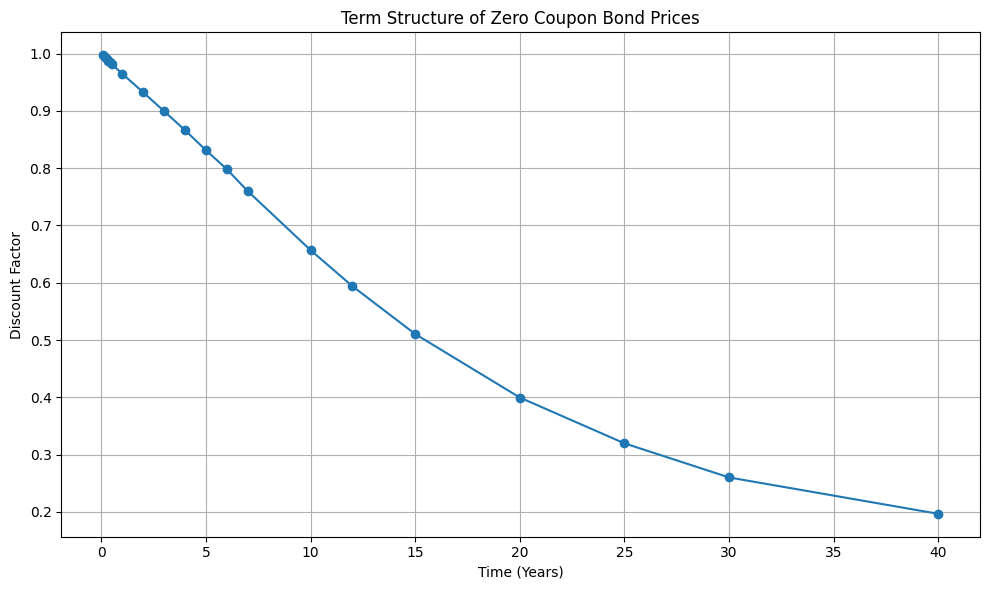

In [107]:
#optional - plot
import matplotlib.pyplot as plt

# Plot term structure of ZCB prices
plt.figure(figsize=(10, 6))
plt.plot(df1["Term_in_years"], df1["Discount Factor"], marker='o')
plt.title("Term Structure of Zero Coupon Bond Prices")
plt.xlabel("Time (Years)")
plt.ylabel("Discount Factor")
plt.grid(True)
plt.tight_layout()
plt.show()

<H2>Task 2:</H2>
Consider an eleven-year interest rate swap paying fixed and receiving floating semi-annually. Using loglinear interpolation of zero coupon bond prices where necessary, determine the fixed rate of this swap such that given the BBSW and swap rates above, the value of the swap is zero. <I>(2 marks)</I>

In [137]:
# this is akin to 1c in tutorial 1. swap rate = numerator/denom (PVfloating/PVfixed)
# we just calculated discount factors out to 40 years, with all the semi annual dfs for 10 < DF < 12 calculated as well
# so we use all DFs out to 11, every 0.5 years

# Create a dictionary of the semi-annual discount factors and their terms
semi_annual_dfs_data = {
    'B(0,T)': [
        'B(0, 0.5)', 'B(0, 1)', 'B(0, 1.5)', 'B(0, 2)', 'B(0, 2.5)', 'B(0, 3)',
        'B(0, 3.5)', 'B(0, 4)', 'B(0, 4.5)', 'B(0, 5)', 'B(0, 5.5)', 'B(0, 6)',
        'B(0, 6.5)', 'B(0, 7)', 'B(0, 7.5)', 'B(0, 8)', 'B(0, 8.5)', 'B(0, 9)',
        'B(0, 9.5)', 'B(0, 10)', 'B(0, 10.5)', 'B(0, 11)'
    ],
    'Discount Factor': [
        B_05, B_1, B_15, B_2, B_25, B_3,
        B_35, B_4, B_45, B_5, B_55, B_6,
        B_65, B_7, B_75, B_8, B_85, B_9,
        B_95, B_10, B_105, B_11
    ]
}

# Create the DataFrame
df_semi_annual_dfs = pd.DataFrame(semi_annual_dfs_data)

# Display the new DataFrame
display(df_semi_annual_dfs)

,"B(0,T)",Discount Factor
0,"B(0, 0.5)",0.981464
1,"B(0, 1)",0.964712
2,"B(0, 1.5)",0.948392
3,"B(0, 2)",0.932349
4,"B(0, 2.5)",0.915730
5,"B(0, 3)",0.899408
6,"B(0, 3.5)",0.882660
7,"B(0, 4)",0.866224
8,"B(0, 4.5)",0.848574
9,"B(0, 5)",0.831283


In [140]:
# Calculate the sum of the 'Discount Factor' column
sum_of_semi_annual_dfs = df_semi_annual_dfs['Discount Factor'].sum()

print(f"The sum of the semi-annual discount factors is: {sum_of_semi_annual_dfs:.6f}")

h = 0.5*sum_of_semi_annual_dfs
g = 1-B_11
print(h)
print(g)

elevenyearswaprate = g/h
print(f"\nThe fixed rate for the eleven-year swap such that its value is zero is: {100*elevenyearswaprate:.6f} %")

#double check that the value of the swap at inception is zero
print(f"\nPV(floating) - PV(fixed) = {g - elevenyearswaprate*h:}")

The sum of the semi-annual discount factors is: 17.678953
8.839476720182475
0.3752973248449145

The fixed rate for the eleven-year swap such that its value is zero is: 4.245696 %

PV(floating) - PV(fixed) = 0.0


<H2>Task 3:</H2>
Suppose that one month ago you entered into a two-year interest rate swap paying a fixed rate of 3.7% and receiving floating (based on three-month BBSW) quarterly. Three-month BBSW on 30 June 2025 was 3.6037%. For the purposes of your calculations, you may assume that one month is exactly 1/12 of a year. Using loglinear interpolation of zero coupon bond prices where necessary, determine the value of this swap on 30 July 2025, consistent with the BBSW and swap rates above. <I>(2 marks)</I>

In [141]:
#Q3

# fixed payments: 30 Sep 2025 (2m), 30 Dec 2025 (5m), 30 Mar 2025 (8m), 30 Jun 2026 (11m), 30 Sep 2026 (14m), 30 Dec 2026 (17m), 30 Mar 2026 (20m), 30 Jun 2026 (23m)
# 8 payments. B(0,2m) and B(0,5m)

#we have the discount factors from 30 July 2025 in task 1. 2m and 5m are in the table already

B2m = df1.loc[(df1['Type'] == 'BBSW') & (df1['Term'] == '2 months'), 'Discount Factor'].values[0]
B5m = df1.loc[(df1['Type'] == 'BBSW') & (df1['Term'] == '5 months'), 'Discount Factor'].values[0]

#we need the rest. have to interpolate from the known discount factors
B8m = B_05**(4/6) * B_1**(2/6)
B11m = B_05**(1/6) * B_1**(5/6)
B14m = B_1**(10/12) * B_2**(2/12)
B17m = B_1**(7/12) * B_2**(5/12)
B20m = B_1**(4/12) * B_2**(8/12)
B23m = B_1**(1/12) * B_2**(11/12)

# Build the DataFrame
swap_payment_dfs_data = {
    'Term': ['2m', '5m', '8m', '11m', '14m', '17m', '20m', '23m'],
    'Discount Factor': [B2m, B5m, B8m, B11m, B14m, B17m, B20m, B23m]
}

df_swap_payment_dfs = pd.DataFrame(swap_payment_dfs_data)

# Add fixed payment
fixed_rate = 3.7 / 100
time_interval = 0.25
df_swap_payment_dfs['Fixed Payment'] = fixed_rate * time_interval
df_swap_payment_dfs['Fixed PV'] = df_swap_payment_dfs['Fixed Payment'] * df_swap_payment_dfs['Discount Factor']

# Display result
display(df_swap_payment_dfs)
sumfixed = df_swap_payment_dfs['Fixed PV'].sum()

print(f"\nPV of fixed payments on 30 Jul 2025 = {sumfixed}")

,Term,Discount Factor,Fixed Payment,Fixed PV
0,2m,0.993877,0.00925,0.009193
1,5m,0.984666,0.00925,0.009108
2,8m,0.975848,0.00925,0.009027
3,11m,0.967484,0.00925,0.008949
4,14m,0.959241,0.00925,0.008873
5,17m,0.951093,0.00925,0.008798
6,20m,0.943014,0.00925,0.008723
7,23m,0.935004,0.00925,0.008649



PV of fixed payments on 30 Jul 2025 = 0.07131959007036653


In [144]:
#split up floating payments into two. Value of the 3m BBSW set 1 month ago, due to be paid on 30Sep25 (2m) discounted back to today (30Jul). So use 2m Discount factor
V1 = 3.6037/100 * 0.25 * B2m

# second, we need the rest of the floating payments. On 30 Sep, the floating payment will be set for 30 Dec25, and on 30Dec25, the floating payment will be set for 30Mar25, etc etc all the way up to
# 30 mar 2026 where the floating rate payment will be set to be paid on 30 Jun 2026
# So if we 'pretend' as if we are at 30 Sep 2025 (2m forward in time), then the floating payments can be determined by 1-B(T1, Tn) which in this case is 1- B(2m,23m).
# but we are really at 30 Jul 2025, so we then need to discount it back by B(0,2m). Call this V2
# recall that B(0,23m) = B(0,2)*B(2,23m) by no arbitrage . So B(2,23m) = B(0,23)/B(0,2).

BT1T2 = B23m/B2m

# or another way, f(0,2m, 23m)
forwardrate = 1/((23/12) - (2/12)) * ((B2m/B23m) - 1)
forwarddiscountrate = 1/(1 + (23/12 - 2/12)*forwardrate)

# Check for approximate equality using a tolerance
tolerance = 1e-10
are_approximately_equal = abs(BT1T2 - forwarddiscountrate) < tolerance
print(f"Are BT1T2 and forwarddiscountrate approximately equal within a tolerance of {tolerance}? {are_approximately_equal}")

# You can also print the values with higher precision to see the difference
print(f"BT1T2:               {BT1T2:.10f}")
print(f"forwarddiscountrate: {forwarddiscountrate:.10f}")

# V2 = (1-B(2m,23m) * B2m)
V2 = (1-BT1T2)* B2m #note this is also equal to B2m - B23m

sumfloating = V1 + V2
print(f"\nPV of floating payments on 30 Jul 2025 = {sumfloating}")


Are BT1T2 and forwarddiscountrate approximately equal within a tolerance of 1e-10? True
BT1T2:               0.9407636946
forwarddiscountrate: 0.9407636946

PV of floating payments on 30 Jul 2025 = 0.06782770281858194


In [145]:
Pvswap = sumfloating - sumfixed # given that we are paying fixed, receiving floating
print(f"The value of the swap is equal to {Pvswap:.10f} for every $1 of notional spent.")


The value of the swap is equal to -0.0034918873 for every $1 of notional spent.


<H2>Task 4:</H2>
Plot the term structure of three-month simple compounded forward rates implied by the term structure derived in Task 1. <I>(2 marks)</I>

In [153]:
# we use the previously calculated discount factors from task 1, interpolate for 0.25y maturities where necessary and then calculate the 3m forward rates

# Create a list of terms from 0.25 to 40 in 0.25 increments
terms_in_years = np.arange(0.25, 40.25, 0.25).tolist()

# Create the 'Term' labels in the format B(0, i)
term_labels = [f'{term:.2f}y' for term in terms_in_years]

# Create the DataFrame
df_term_structure = pd.DataFrame({
    'Term': term_labels,
    'Term_in_years': terms_in_years,
    'Discount Factor': None # Initialize Discount Factor column as None
})

# Create a list of the discount factor values to be assigned
discount_factor_values = [
    B_025, B_05, B_075, B_1, B_125, B_15,
    B_175, B_2, B_225, B_25, B_275, B_3
]

# Assign these values to the 'Discount Factor' column for the first 12 rows
# Use .loc for label-based indexing if the index is the default 0, 1, 2...
df_term_structure.loc[0:11, 'Discount Factor'] = discount_factor_values

df_term_structure

,Term,Term_in_years,Discount Factor
0,0.25y,0.25,0.99083
1,0.50y,0.50,0.981464
2,0.75y,0.75,0.973052
3,1.00y,1.00,0.964712
4,1.25y,1.25,0.956517
...,...,...,...
155,39.00y,39.00,None
156,39.25y,39.25,None
157,39.50y,39.50,None
158,39.75y,39.75,None


In [154]:
# Create a dictionary of calculated discount factors for terms from 3.5 to 10 years at 0.5 year intervals
calculated_dfs_3_to_10 = {
    3.50: B_35,
    4.00: B_4,
    4.50: B_45,
    5.00: B_5,
    5.50: B_55,
    6.00: B_6,
    6.50: B_65,
    7.00: B_7,
    7.50: B_75,
    8.00: B_8,
    8.50: B_85,
    9.00: B_9,
    9.50: B_95,
    10.00: B_10
}

# Iterate through the dictionary and update df_term_structure
for time_in_years, discount_factor in calculated_dfs_3_to_10.items():
    # Find the index in df_term_structure where "term_in_years" matches the key
    # Using the column name
    index_to_update = df_term_structure[df_term_structure["Term_in_years"] == time_in_years].index
    if not index_to_update.empty:
        # Update the 'Discount Factor' at the found index
        df_term_structure.loc[index_to_update, 'Discount Factor'] = discount_factor

# Display the updated part of the DataFrame for the relevant range
display(df_term_structure[(df_term_structure["Term_in_years"] >= 3.5) & (df_term_structure["Term_in_years"] <= 10.0)])

,Term,Term_in_years,Discount Factor
13,3.50y,3.50,0.88266
14,3.75y,3.75,None
15,4.00y,4.00,0.866224
16,4.25y,4.25,None
17,4.50y,4.50,0.848574
18,4.75y,4.75,None
19,5.00y,5.00,0.831283
20,5.25y,5.25,None
21,5.50y,5.50,0.814514
22,5.75y,5.75,None


In [155]:
# Create a dictionary of calculated discount factors for terms from 10.5 to 40 years
calculated_dfs_10_to_40 = {
    10.50: B_105,
    11.00: B_11,
    11.50: B_115,
    12.00: B_12,
    12.50: B1_125,
    13.00: B1_13,
    13.50: B1_135,
    14.00: B1_14,
    14.50: B1_145,
    15.00: B1_15,
    15.50: B1_155,
    16.00: B1_16,
    16.50: B1_165,
    17.00: B1_17,
    17.50: B1_175,
    18.00: B1_18,
    18.50: B1_185,
    19.00: B1_19,
    19.50: B1_195,
    20.00: B1_20,
    20.50: B1_205,
    21.00: B1_21,
    21.50: B1_215,
    22.00: B1_22,
    22.50: B1_225,
    23.00: B1_23,
    23.50: B1_235,
    24.00: B1_24,
    24.50: B1_245,
    25.00: B1_25,
    25.50: B1_255,
    26.00: B1_26,
    26.50: B1_265,
    27.00: B1_27,
    27.50: B1_275,
    28.00: B1_28,
    28.50: B1_285,
    29.00: B1_29,
    29.50: B1_295,
    30.00: B1_30,
    30.50: B1_305,
    31.00: B1_31,
    31.50: B1_315,
    32.00: B1_32,
    32.50: B1_325,
    33.00: B1_33,
    33.50: B1_335,
    34.00: B1_34,
    34.50: B1_345,
    35.00: B1_35,
    35.50: B1_355,
    36.00: B1_36,
    36.50: B1_365,
    37.00: B1_37,
    37.50: B1_375,
    38.00: B1_38,
    38.50: B1_385,
    39.00: B1_39,
    39.50: B1_395,
    40.00: B1_40
}

# Iterate through the dictionary and update df_term_structure
for time_in_years, discount_factor in calculated_dfs_10_to_40.items():
    # Find the index in df_term_structure where 'time in years' matches the key
    index_to_update = df_term_structure[df_term_structure['Term_in_years'] == time_in_years].index
    if not index_to_update.empty:
        # Update the 'Discount Factor' at the found index
        df_term_structure.loc[index_to_update, 'Discount Factor'] = discount_factor

# Display the updated part of the DataFrame for the relevant range
display(df_term_structure[(df_term_structure['Term_in_years'] >= 10.5) & (df_term_structure['Term_in_years'] <= 40.0)])

,Term,Term_in_years,Discount Factor
41,10.50y,10.50,0.640626
42,10.75y,10.75,None
43,11.00y,11.00,0.624703
44,11.25y,11.25,None
45,11.50y,11.50,0.609175
...,...,...,...
155,39.00y,39.00,0.20236
156,39.25y,39.25,None
157,39.50y,39.50,0.199551
158,39.75y,39.75,None


In [156]:
# POPULATING VIA INTERP
df_term_structure.loc[df_term_structure['Term_in_years'] == 3.25, 'Discount Factor'] = B_3**(3/4) * B_4**(1/4)
df_term_structure.loc[df_term_structure['Term_in_years'] == 3.75, 'Discount Factor'] = B_3**(1/4) * B_4**(3/4)
df_term_structure.loc[df_term_structure['Term_in_years'] == 4.25, 'Discount Factor'] = B_4**(3/4) * B_5**(1/4)
df_term_structure.loc[df_term_structure['Term_in_years'] == 4.75, 'Discount Factor'] = B_4**(1/4) * B_5**(3/4)
df_term_structure.loc[df_term_structure['Term_in_years'] == 5.25, 'Discount Factor'] = B_5**(3/4) * B_6**(1/4)
df_term_structure.loc[df_term_structure['Term_in_years'] == 5.75, 'Discount Factor'] = B_5**(1/4) * B_6**(3/4)
df_term_structure.loc[df_term_structure['Term_in_years'] == 6.25, 'Discount Factor'] = B_6**(3/4) * B_7**(1/4)
df_term_structure.loc[df_term_structure['Term_in_years'] == 6.75, 'Discount Factor'] = B_6**(1/4) * B_7**(3/4)

df_term_structure.loc[df_term_structure['Term_in_years'] == 7.25, 'Discount Factor'] = B_7**(11/12) * B_10**(1/12)
df_term_structure.loc[df_term_structure['Term_in_years'] == 7.75, 'Discount Factor'] = B_7**(9/12) * B_10**(3/12)
df_term_structure.loc[df_term_structure['Term_in_years'] == 8.25, 'Discount Factor'] = B_7**(7/12) * B_10**(5/12)
df_term_structure.loc[df_term_structure['Term_in_years'] == 8.75, 'Discount Factor'] = B_7**(5/12) * B_10**(7/12)
df_term_structure.loc[df_term_structure['Term_in_years'] == 9.25, 'Discount Factor'] = B_7**(3/12) * B_10**(9/12)
df_term_structure.loc[df_term_structure['Term_in_years'] == 9.75, 'Discount Factor'] = B_7**(1/12) * B_10**(11/12)

df_term_structure.loc[df_term_structure['Term_in_years'] == 10.25, 'Discount Factor'] = B_10**(7/8) * B_12**(1/8)
df_term_structure.loc[df_term_structure['Term_in_years'] == 10.75, 'Discount Factor'] = B_10**(5/8) * B_12**(3/8)
df_term_structure.loc[df_term_structure['Term_in_years'] == 11.25, 'Discount Factor'] = B_10**(3/8) * B_12**(5/8)
df_term_structure.loc[df_term_structure['Term_in_years'] == 11.75, 'Discount Factor'] = B_10**(1/8) * B_12**(7/8)

df_term_structure.loc[df_term_structure['Term_in_years'] == 12.25, 'Discount Factor'] = B_12**(11/12) * B1_15**(1/12)
df_term_structure.loc[df_term_structure['Term_in_years'] == 12.75, 'Discount Factor'] = B_12**(9/12) * B1_15**(3/12)
df_term_structure.loc[df_term_structure['Term_in_years'] == 13.25, 'Discount Factor'] = B_12**(7/12) * B1_15**(5/12)
df_term_structure.loc[df_term_structure['Term_in_years'] == 13.75, 'Discount Factor'] = B_12**(5/12) * B1_15**(7/12)
df_term_structure.loc[df_term_structure['Term_in_years'] == 14.25, 'Discount Factor'] = B_12**(3/12) * B1_15**(9/12)
df_term_structure.loc[df_term_structure['Term_in_years'] == 14.75, 'Discount Factor'] = B_12**(1/12) * B1_15**(11/12)


In [157]:
df_term_structure.loc[df_term_structure['Term_in_years'] == 15.25, 'Discount Factor'] = B1_15**(19/20) * B1_20**(1/20)
df_term_structure.loc[df_term_structure['Term_in_years'] == 15.75, 'Discount Factor'] = B1_15**(17/20) * B1_20**(3/20)
df_term_structure.loc[df_term_structure['Term_in_years'] == 16.25, 'Discount Factor'] = B1_15**(15/20) * B1_20**(5/20)
df_term_structure.loc[df_term_structure['Term_in_years'] == 16.75, 'Discount Factor'] = B1_15**(13/20) * B1_20**(7/20)
df_term_structure.loc[df_term_structure['Term_in_years'] == 17.25, 'Discount Factor'] = B1_15**(11/20) * B1_20**(9/20)
df_term_structure.loc[df_term_structure['Term_in_years'] == 17.75, 'Discount Factor'] = B1_15**(9/20) * B1_20**(11/20)
df_term_structure.loc[df_term_structure['Term_in_years'] == 18.25, 'Discount Factor'] = B1_15**(7/20) * B1_20**(13/20)
df_term_structure.loc[df_term_structure['Term_in_years'] == 18.75, 'Discount Factor'] = B1_15**(5/20) * B1_20**(15/20)
df_term_structure.loc[df_term_structure['Term_in_years'] == 19.25, 'Discount Factor'] = B1_15**(3/20) * B1_20**(17/20)
df_term_structure.loc[df_term_structure['Term_in_years'] == 19.75, 'Discount Factor'] = B1_15**(1/20) * B1_20**(19/20)

df_term_structure.loc[df_term_structure['Term_in_years'] == 20.25, 'Discount Factor'] = B1_20**(19/20) * B1_25**(1/20)
df_term_structure.loc[df_term_structure['Term_in_years'] == 20.75, 'Discount Factor'] = B1_20**(17/20) * B1_25**(3/20)
df_term_structure.loc[df_term_structure['Term_in_years'] == 21.25, 'Discount Factor'] = B1_20**(15/20) * B1_25**(5/20)
df_term_structure.loc[df_term_structure['Term_in_years'] == 21.75, 'Discount Factor'] = B1_20**(13/20) * B1_25**(7/20)
df_term_structure.loc[df_term_structure['Term_in_years'] == 22.25, 'Discount Factor'] = B1_20**(11/20) * B1_25**(9/20)
df_term_structure.loc[df_term_structure['Term_in_years'] == 22.75, 'Discount Factor'] = B1_20**(9/20) * B1_25**(11/20)
df_term_structure.loc[df_term_structure['Term_in_years'] == 23.25, 'Discount Factor'] = B1_20**(7/20) * B1_25**(13/20)
df_term_structure.loc[df_term_structure['Term_in_years'] == 23.75, 'Discount Factor'] = B1_20**(5/20) * B1_25**(15/20)
df_term_structure.loc[df_term_structure['Term_in_years'] == 24.25, 'Discount Factor'] = B1_20**(3/20) * B1_25**(17/20)
df_term_structure.loc[df_term_structure['Term_in_years'] == 24.75, 'Discount Factor'] = B1_20**(1/20) * B1_25**(19/20)

df_term_structure.loc[df_term_structure['Term_in_years'] == 25.25, 'Discount Factor'] = B1_25**(19/20) * B1_30**(1/20)
df_term_structure.loc[df_term_structure['Term_in_years'] == 25.75, 'Discount Factor'] = B1_25**(17/20) * B1_30**(3/20)
df_term_structure.loc[df_term_structure['Term_in_years'] == 26.25, 'Discount Factor'] = B1_25**(15/20) * B1_30**(5/20)
df_term_structure.loc[df_term_structure['Term_in_years'] == 26.75, 'Discount Factor'] = B1_25**(13/20) * B1_30**(7/20)
df_term_structure.loc[df_term_structure['Term_in_years'] == 27.25, 'Discount Factor'] = B1_25**(11/20) * B1_30**(9/20)
df_term_structure.loc[df_term_structure['Term_in_years'] == 27.75, 'Discount Factor'] = B1_25**(9/20) * B1_30**(11/20)
df_term_structure.loc[df_term_structure['Term_in_years'] == 28.25, 'Discount Factor'] = B1_25**(7/20) * B1_30**(13/20)
df_term_structure.loc[df_term_structure['Term_in_years'] == 28.75, 'Discount Factor'] = B1_25**(5/20) * B1_30**(15/20)
df_term_structure.loc[df_term_structure['Term_in_years'] == 29.25, 'Discount Factor'] = B1_25**(3/20) * B1_30**(17/20)
df_term_structure.loc[df_term_structure['Term_in_years'] == 29.75, 'Discount Factor'] = B1_25**(1/20) * B1_30**(19/20)

In [158]:
df_term_structure.loc[df_term_structure['Term_in_years'] == 30.25, 'Discount Factor'] = B1_30**(39/40) * B1_40**(1/40)
df_term_structure.loc[df_term_structure['Term_in_years'] == 30.75, 'Discount Factor'] = B1_30**(37/40) * B1_40**(3/40)
df_term_structure.loc[df_term_structure['Term_in_years'] == 31.25, 'Discount Factor'] = B1_30**(35/40) * B1_40**(5/40)
df_term_structure.loc[df_term_structure['Term_in_years'] == 31.75, 'Discount Factor'] = B1_30**(33/40) * B1_40**(7/40)
df_term_structure.loc[df_term_structure['Term_in_years'] == 32.25, 'Discount Factor'] = B1_30**(31/40) * B1_40**(9/40)
df_term_structure.loc[df_term_structure['Term_in_years'] == 32.75, 'Discount Factor'] = B1_30**(29/40) * B1_40**(11/40)
df_term_structure.loc[df_term_structure['Term_in_years'] == 33.25, 'Discount Factor'] = B1_30**(27/40) * B1_40**(13/40)
df_term_structure.loc[df_term_structure['Term_in_years'] == 33.75, 'Discount Factor'] = B1_30**(25/40) * B1_40**(15/40)
df_term_structure.loc[df_term_structure['Term_in_years'] == 34.25, 'Discount Factor'] = B1_30**(23/40) * B1_40**(17/40)
df_term_structure.loc[df_term_structure['Term_in_years'] == 34.75, 'Discount Factor'] = B1_30**(21/40) * B1_40**(19/40)
df_term_structure.loc[df_term_structure['Term_in_years'] == 35.25, 'Discount Factor'] = B1_30**(19/40) * B1_40**(21/40)
df_term_structure.loc[df_term_structure['Term_in_years'] == 35.75, 'Discount Factor'] = B1_30**(17/40) * B1_40**(23/40)
df_term_structure.loc[df_term_structure['Term_in_years'] == 36.25, 'Discount Factor'] = B1_30**(15/40) * B1_40**(25/40)
df_term_structure.loc[df_term_structure['Term_in_years'] == 36.75, 'Discount Factor'] = B1_30**(13/40) * B1_40**(27/40)
df_term_structure.loc[df_term_structure['Term_in_years'] == 37.25, 'Discount Factor'] = B1_30**(11/40) * B1_40**(29/40)
df_term_structure.loc[df_term_structure['Term_in_years'] == 37.75, 'Discount Factor'] = B1_30**(9/40) * B1_40**(31/40)
df_term_structure.loc[df_term_structure['Term_in_years'] == 38.25, 'Discount Factor'] = B1_30**(7/40) * B1_40**(33/40)
df_term_structure.loc[df_term_structure['Term_in_years'] == 38.75, 'Discount Factor'] = B1_30**(5/40) * B1_40**(35/40)
df_term_structure.loc[df_term_structure['Term_in_years'] == 39.25, 'Discount Factor'] = B1_30**(3/40) * B1_40**(37/40)
df_term_structure.loc[df_term_structure['Term_in_years'] == 39.75, 'Discount Factor'] = B1_30**(1/40) * B1_40**(39/40)

In [159]:
df_term_structure['Discount Factor'] = df_term_structure['Discount Factor'].map(lambda x: f'{x:.10f}' if pd.notnull(x) else None)
df_term_structure[0:160]

,Term,Term_in_years,Discount Factor
0,0.25y,0.25,0.9908303604
1,0.50y,0.50,0.9814640696
2,0.75y,0.75,0.9730518471
3,1.00y,1.00,0.9647117265
4,1.25y,1.25,0.9565171388
...,...,...,...
155,39.00y,39.00,0.2023597916
156,39.25y,39.25,0.2009504351
157,39.50y,39.50,0.1995508943
158,39.75y,39.75,0.1981611007


In [160]:
# check that all discount factors are non-decreasing - means its inputted correctly

# Ensure 'Discount Factor' column is numeric for comparison
df_term_structure['Discount Factor'] = pd.to_numeric(df_term_structure['Discount Factor'])

is_strictly_decreasing = True
non_decreasing_intervals = []

# Iterate through the DataFrame, excluding the last row
for i in range(len(df_term_structure) - 1):
    current_df = df_term_structure.loc[i, 'Discount Factor']
    next_df = df_term_structure.loc[i + 1, 'Discount Factor']

    # Only compare if both discount factors are not NaN
    if pd.notna(current_df) and pd.notna(next_df):
        if current_df <= next_df:
            is_strictly_decreasing = False
            t1 = df_term_structure.loc[i, 'Term_in_years']
            t2 = df_term_structure.loc[i + 1, 'Term_in_years']
            non_decreasing_intervals.append((t1, t2, current_df, next_df))

if is_strictly_decreasing:
    print("The 'Discount Factor' is strictly decreasing for all consecutive non-NaN values.")
else:
    print("The 'Discount Factor' is NOT strictly decreasing in the following intervals:")
    for interval in non_decreasing_intervals:
        print(f"  From time={interval[0]:.2f} (DF={interval[2]:.6f}) to time={interval[1]:.2f} (DF={interval[3]:.6f})")

The 'Discount Factor' is strictly decreasing for all consecutive non-NaN values.


,Term,Term_in_years,Discount Factor,3m Forward Rate
0,0.25y,0.25,0.990830,None
1,0.50y,0.50,0.981464,0.038173
2,0.75y,0.75,0.973052,0.034581
3,1.00y,1.00,0.964712,0.034581
4,1.25y,1.25,0.956517,0.034268
...,...,...,...,...
155,39.00y,39.00,0.202360,0.028054
156,39.25y,39.25,0.200950,0.028054
157,39.50y,39.50,0.199551,0.028054
158,39.75y,39.75,0.198161,0.028054


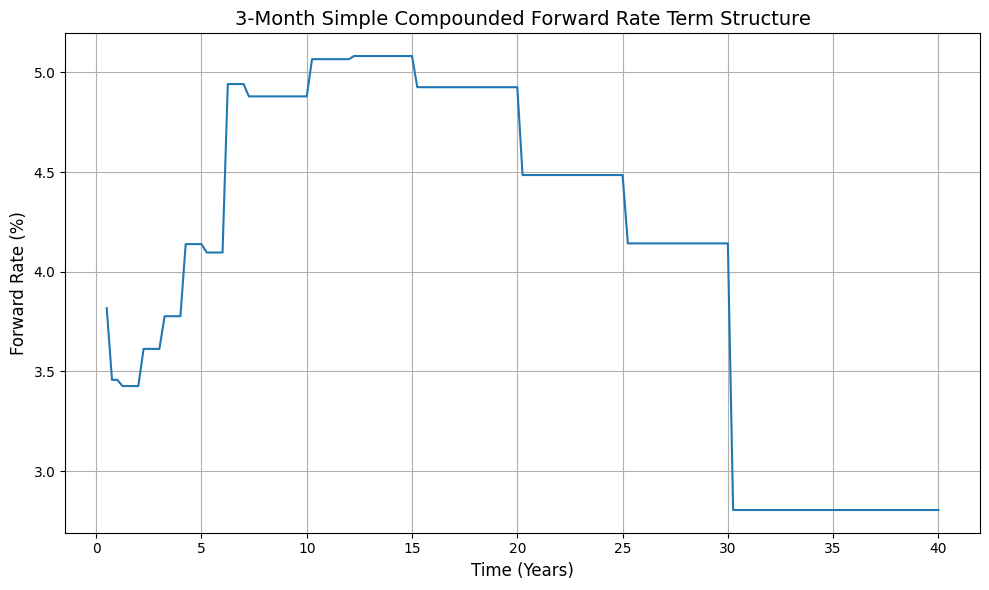

In [161]:
# Initialize the forward rate column.
df_term_structure['3m Forward Rate'] = None

# Important: the order of 3m forward rates go from f(0,T1,T2) where 0 < T1 < T2. Hence, this is from f(0,0.25,0.50), f(0,0.5, 0.75)...all the way up to f(0,39.75,40).

# Ensure 'Discount Factor' column is numeric
df_term_structure['Discount Factor'] = pd.to_numeric(df_term_structure['Discount Factor'])

# Loop from index 1 to calculate forward rates. this is f(0,T1,T2)
for i in range(1, len(df_term_structure)):
    T1 = df_term_structure.loc[i - 1, 'Term_in_years']
    T2 = df_term_structure.loc[i, 'Term_in_years']
    B_T1 = df_term_structure.loc[i - 1, 'Discount Factor']
    B_T2 = df_term_structure.loc[i, 'Discount Factor']

    # Calculate the 3-month simple compounded forward rate
    forward_rate = (B_T1 / B_T2 - 1) / (T2 - T1)

    # Store the result
    df_term_structure.loc[i, '3m Forward Rate'] = forward_rate

# Drop the first row where Forward Rate is NaN
plot_df = df_term_structure[df_term_structure['3m Forward Rate'].notna()]

display(df_term_structure)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(plot_df['Term_in_years'], plot_df['3m Forward Rate'] * 100)

# Formatting
plt.title('3-Month Simple Compounded Forward Rate Term Structure', fontsize=14)
plt.xlabel('Time (Years)', fontsize=12)
plt.ylabel('Forward Rate (%)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

In [162]:
# note we have omitted f(0,0,25) from the above chart given that this is just the same as the spot rate from 0-3m, and not in line with our definition of f(0,T1, T2) where 0 < T1 < T2
# but if we were to calculate it, f(0,0,25) = (B(0,0)/B(0,0.25) - 1) / (0.25-0)
f0025 = (1/B_025 - 1)/0.25
print(f0025)
r025 = df1.loc[(df1['Term_in_years'] == 0.25) & (df1['Type'] == 'BBSW'), 'Rate'].values[0] / 100  # which is just equal to 3m BBSW as given in the initial df from task 1
print(r025)

0.03701799999999977
0.037018
